In [6]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [7]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [8]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=5, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 805,066
Trainable params: 805,066
Non-trainable params: 0
________________________________________________

In [10]:
hist = model.fit(x_train.reshape(-1,28,28,1), t_train,
                 batch_size=50, epochs=50, validation_data=(x_test.reshape(-1,28,28,1), t_test))

Epoch 1/50
1200/1200 [==============================] - 17s 6ms/step - loss: 0.1409 - accuracy: 0.9582 - val_loss: 0.0523 - val_accuracy: 0.9829
Epoch 2/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0478 - val_accuracy: 0.9835
Epoch 3/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0370 - val_accuracy: 0.9863
Epoch 4/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0402 - val_accuracy: 0.9864
Epoch 5/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0341 - val_accuracy: 0.9896
Epoch 6/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0361 - val_accuracy: 0.9884
Epoch 7/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0418 - val_accuracy

In [11]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0962 - accuracy: 0.9898


[0.09617842733860016, 0.989799976348877]

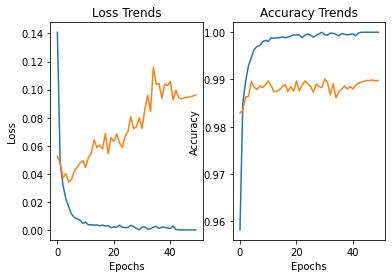

In [12]:
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trends')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trends')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [13]:
ret_val = model.predict(x_test.reshape(-1,28,28,1))

print(f'ret_val.type : {type(ret_val)}, ret_val.shape : {ret_val.shape}')

predicted_val = np.argmax(ret_val,axis=1)

predicted_comp_list = np.equal(predicted_val, t_test)

index_label_prediction = [ [index, t_test[index], predicted_val[index]] for index, result in enumerate(predicted_comp_list) if result == False ]

print(len(index_label_prediction))



ret_val.type : <class 'numpy.ndarray'>, ret_val.shape : (10000, 10)
102


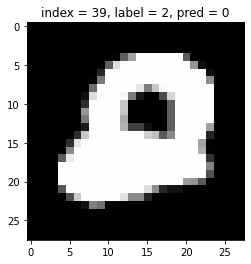

In [14]:
false_data_index = np.random.randint(len(index_label_prediction))

mnist_index = index_label_prediction[false_data_index][0]
label = index_label_prediction[false_data_index][1]
prediction = index_label_prediction[false_data_index][2]

title_str = f'index = {false_data_index}, label = {label}, pred = {prediction}'

img = x_test[mnist_index].reshape(28,28)

plt.title(title_str)
plt.imshow(img,cmap='gray')
plt.show()